In [2]:
import numpy as np
import pandas as pd

In [3]:
new_data = pd.read_csv('new_data.csv')
new_data.head()

call_id  customer_id  agent_id_x  call_start_datetime  \
0  4667960400   2033123310      963118  2024-07-31 23:56:00   
1  1122072124   8186702651      519057  2024-08-01 00:03:00   
2  6834291559   2416856629      158319  2024-07-31 23:59:00   
3  2266439882   1154544516      488324  2024-08-01 00:05:00   
4  1211603231   5214456437      721730  2024-08-01 00:04:00   

  agent_assigned_datetime    call_end_datetime  \
0     2024-08-01 00:03:00  2024-08-01 00:34:00   
1     2024-08-01 00:06:00  2024-08-01 00:18:00   
2     2024-08-01 00:07:00  2024-08-01 00:26:00   
3     2024-08-01 00:10:00  2024-08-01 00:17:00   
4     2024-08-01 00:14:00  2024-08-01 00:23:00   

                                     call_transcript primary_call_reason  \
0  \n\nAgent: Thank you for calling United Airlin...   Voluntary  Cancel   
1  \n\nAgent: Thank you for calling United Airlin...             Booking   
2  \n\nAgent: Thank you for calling United Airlin...              IRROPS   
3  \n\nAgent: Thank you for calling United Airlin...             Upgrade   
4  \n\nAgent: Thank you for calling United Airlin...             Seating   

   agent_id_y agent_tone customer_tone  average_sentiment  \
0      963118    neutral         angry              -0.04   
1      519057       calm       neutral               0.02   
2      158319    neutral        polite              -0.13   
3      488324    neutral    frustrated              -0.20   
4      721730    neutral        polite              -0.05   

   silence_percent_average      customer_name  elite_level_code  AHT_seconds  \
0                     0.39     Matthew Foster               4.0       2280.0   
1                     0.35      Tammy Walters               0.0        900.0   
2                     0.32      Jeffery Dixon               0.0       1620.0   
3                     0.20      David Wilkins               2.0        720.0   
4                     0.35  Elizabeth Daniels               0.0       1140.0   

               AST  AST_seconds   call_date  
0  0 days 00:07:00        420.0  2024-07-31  
1  0 days 00:03:00        180.0  2024-08-01  
2  0 days 00:08:00        480.0  2024-07-31  
3  0 days 00:05:00        300.0  2024-08-01  
4  0 days 00:10:00        600.0  2024-08-01

In [4]:
calls= pd.read_csv('callsf0d4f5a.csv')
sentiment= pd.read_csv('sentiment_statisticscc1e57a.csv')
reasons= pd.read_csv('reason18315ff.csv')
customer= pd.read_csv('customers2afd6ea.csv')

In [5]:
new_data['call_transcript'].iloc[1]

"\n\nAgent: Thank you for calling United Airlines, my name is Sam, how can I help you today?\n\nCustomer: Hi Sam, yeah I'm calling because I need to change the dates on my upcoming flight. My flight is booked for next Thursday but something came up and I need to fly out on Monday instead.\n\nAgent: No problem, let me pull up your reservation so I can take a look. Can I get your last name and confirmation number please? \n\nCustomer: Sure, last name is Smith, confirmation number is ASDF456. *makes noise in background* Sorry, the kids are being loud over here. \n\nAgent: No worries, let me see... Okay Mr. Smith, I've got your reservation here for flight UA128 next Thursday. Just giving the availability a check for Monday... Umm it looks like we do have seats available on a flight leaving earlier that day. The fare would be an additional $100 each way though. How does that work for you?\n\nCustomer: Ah man, an extra $100? That's more than I was hoping to pay. Is there any way to get on th

In [9]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Function to clean the transcript text
def clean_transcript(text):
    # Remove patterns like \n\nCustomer: and \n\nAgent:
    text = re.sub(r'\n\n(Customer|Agent):', '', text)
    # Remove special characters and lowercase the text
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    return cleaned_text

# Apply the cleaning function to the call_transcript column
new_data['cleaned_transcript'] = new_data['call_transcript'].apply(clean_transcript)

# Display cleaned transcripts for verification
print(new_data['cleaned_transcript'].head())

0     thank you for calling united airlines custome...
1     thank you for calling united airlines my name...
2     thank you for calling united airlines custome...
3     thank you for calling united airlines custome...
4     thank you for calling united airlines custome...
Name: cleaned_transcript, dtype: object


In [10]:
new_data['call_transcript'].iloc[1]

"\n\nAgent: Thank you for calling United Airlines, my name is Sam, how can I help you today?\n\nCustomer: Hi Sam, yeah I'm calling because I need to change the dates on my upcoming flight. My flight is booked for next Thursday but something came up and I need to fly out on Monday instead.\n\nAgent: No problem, let me pull up your reservation so I can take a look. Can I get your last name and confirmation number please? \n\nCustomer: Sure, last name is Smith, confirmation number is ASDF456. *makes noise in background* Sorry, the kids are being loud over here. \n\nAgent: No worries, let me see... Okay Mr. Smith, I've got your reservation here for flight UA128 next Thursday. Just giving the availability a check for Monday... Umm it looks like we do have seats available on a flight leaving earlier that day. The fare would be an additional $100 each way though. How does that work for you?\n\nCustomer: Ah man, an extra $100? That's more than I was hoping to pay. Is there any way to get on th

In [11]:
# Use TF-IDF to identify important words, excluding common stop words
tfidf = TfidfVectorizer(stop_words='english')

# Fit the vectorizer on the cleaned transcripts
tfidf_matrix = tfidf.fit_transform(new_data['cleaned_transcript'])

# Get the feature names (words) and their TF-IDF scores
words = tfidf.get_feature_names_out()

In [12]:
# Sum the TF-IDF values for each word across all documents
word_sums = tfidf_matrix.sum(axis=0)

# Create a DataFrame of words and their summed TF-IDF scores
import pandas as pd
word_freq = pd.DataFrame({'word': words, 'tfidf': word_sums.A1})

# Sort by TF-IDF scores to identify the most frequent words/issues
word_freq.sort_values(by='tfidf', ascending=False, inplace=True)
print(word_freq.head(20))  # Top 20 recurring words

          word         tfidf
8131    flight  12296.209914
3757    change   6858.888740
12797      let   5872.440093
10982       im   4576.424091
9732      help   3979.573438
12859     like   3844.969370
22081    thank   3642.371920
7831       fee   3619.039640
24112   united   3320.434701
25263     work   3230.602551
3363   calling   3193.326549
23518   typing   3131.356597
14553     need   3129.720461
16527       pm   3065.388905
12253     just   2985.762796
22705     time   2972.847505
5484       day   2965.861788
15297     okay   2874.829288
25797     yeah   2802.610694
4024   chicago   2790.819566


In [13]:
reasons.head(6)

call_id primary_call_reason
0  4667960400   Voluntary  Cancel
1  1122072124             Booking
2  6834291559              IRROPS
3  2266439882             Upgrade
4  1211603231             Seating
5  5297766997      Mileage   Plus

In [14]:
reasons.groupby(reasons['primary_call_reason']).value_counts()

primary_call_reason  call_id   
 Baggage             7262804       1
                     45367961      1
                     5906392137    1
                     2936396672    1
                     2958353468    1
                                  ..
Voluntary Change     1971779974    1
                     2071456077    1
                     2172246118    1
                     2268335251    1
                     9967641048    1
Name: count, Length: 66653, dtype: int64

In [15]:
reasons['primary_call_reason'].value_counts()

primary_call_reason
IRROPS                     13057
Voluntary Change           10291
Seating                     6223
Mileage Plus                5487
Post-Flight                 3869
Communications              3779
Products and Services       2792
Upgrade                     2682
Baggage                     2616
Booking                     2589
Checkout                    1840
Check-In                    1490
Voluntary Cancel            1304
Digital Support              996
ETC                          930
Traveler Updates             772
Schedule Change              707
Other Topics                 568
Products & Services          476
Disability                   394
Check In                     385
Post Flight                  373
Voluntary  Cancel            278
IRROPS                       254
Other  Topics                234
Voluntary Change             208
Voluntary   Change           200
Voluntary  Change            149
Seating                      142
Digital   Support      

In [16]:
# Assuming 'word_freq' contains frequent words from TF-IDF
# and 'primary_call_reason' is a column in your dataset

# Createed a word_freq dataframe 
# word_freq = pd.DataFrame({'word': ['change', 'baggage', 'upgrade', 'seat', 'flight'], 'tfidf': [0.9, 0.8, 0.7, 0.6, 0.5]})

# Sample 'primary_call_reason' data (replace with actual data)
# new_data['primary_call_reason'] have the reasons column
primary_call_reason_map = {
    'Voluntary Change': ['change', 'flight', 'book', 'date'],
    'Baggage': ['baggage', 'lost', 'claim'],
    'Upgrade': ['upgrade', 'seat', 'reserve'],
    'Mileage Plus': ['mileage', 'points', 'reward'],
    'Booking': ['book', 'reserve', 'confirm'],
    'Seating': ['seat', 'window', 'aisle'],
    # Add more mappings based on your understanding
}

In [17]:
# Create a function to map words to primary call reasons
def map_words_to_reasons(word):
    for reason, keywords in primary_call_reason_map.items():
        if word in keywords:
            return reason
    return 'Other'  # If no match found

# Apply this function to the 'word' column of word_freq
word_freq['primary_call_reason'] = word_freq['word'].apply(map_words_to_reasons)

In [18]:
# Now, summarize how often words are related to each call reason
reason_summary = word_freq.groupby('primary_call_reason').agg({
    'word': 'count',  # Number of words mapped to this reason
    'tfidf': 'sum'    # Sum of tfidf scores for this reason
}).reset_index()

# Sort by tfidf to see most impactful reasons
reason_summary = reason_summary.sort_values(by='tfidf', ascending=False)

# Show the summary
print(reason_summary)

# Output insights for self-service options
print("Self-service opportunities in IVR:")
for index, row in reason_summary.iterrows():
    reason = row['primary_call_reason']
    if reason != 'Other':
        print(f"Consider self-service options for Reason= {reason}, based on frequent terms like: {primary_call_reason_map[reason]}.")

  primary_call_reason   word          tfidf
3               Other  26142  681378.169691
6    Voluntary Change      4   22421.628948
5             Upgrade      3    2283.009989
0             Baggage      3     783.615655
4             Seating      2     732.092324
1             Booking      1     404.256932
2        Mileage Plus      3     358.409064
Self-service opportunities in IVR:
Consider self-service options for Reason= Voluntary Change, based on frequent terms like: ['change', 'flight', 'book', 'date'].
Consider self-service options for Reason= Upgrade, based on frequent terms like: ['upgrade', 'seat', 'reserve'].
Consider self-service options for Reason= Baggage, based on frequent terms like: ['baggage', 'lost', 'claim'].
Consider self-service options for Reason= Seating, based on frequent terms like: ['seat', 'window', 'aisle'].
Consider self-service options for Reason= Booking, based on frequent terms like: ['book', 'reserve', 'confirm'].
Consider self-service options for Reas

In [23]:
import pandas as pd

# Creating a list of dictionaries with reasons and their related frequent words
reasons_words = [
    {"Reason": "Voluntary Change", "Frequent Words": ['change', 'flight', 'book', 'date']},
    {"Reason": "Upgrade", "Frequent Words": ['upgrade', 'seat', 'reserve']},
    {"Reason": "Baggage", "Frequent Words": ['baggage', 'lost', 'claim']},
    {"Reason": "Seating", "Frequent Words": ['seat', 'window', 'aisle']},
    {"Reason": "Booking", "Frequent Words": ['book', 'reserve', 'confirm']},
    {"Reason": "Mileage Plus", "Frequent Words": ['mileage', 'points', 'reward']}
]

# Convert the list of dictionaries into a DataFrame
df_reasons_words = pd.DataFrame(reasons_words)

# Display the DataFrame
print(df_reasons_words)

             Reason                Frequent Words
0  Voluntary Change  [change, flight, book, date]
1           Upgrade      [upgrade, seat, reserve]
2           Baggage        [baggage, lost, claim]
3           Seating         [seat, window, aisle]
4           Booking      [book, reserve, confirm]
5      Mileage Plus     [mileage, points, reward]


In [24]:
new_data.head(1)

call_id  customer_id  agent_id_x  call_start_datetime  \
0  4667960400   2033123310      963118  2024-07-31 23:56:00   

  agent_assigned_datetime    call_end_datetime  \
0     2024-08-01 00:03:00  2024-08-01 00:34:00   

                                     call_transcript primary_call_reason  \
0  \n\nAgent: Thank you for calling United Airlin...   Voluntary  Cancel   

   agent_id_y agent_tone customer_tone  average_sentiment  \
0      963118    neutral         angry              -0.04   

   silence_percent_average   customer_name  elite_level_code  AHT_seconds  \
0                     0.39  Matthew Foster               4.0       2280.0   

               AST  AST_seconds   call_date  \
0  0 days 00:07:00        420.0  2024-07-31   

                                  cleaned_transcript  
0   thank you for calling united airlines custome...

# Deliverable 3:

In [26]:
cleaned_data = pd.read_csv('cleaned_data.csv')
cleaned_data.head(2)

call_id  customer_id  agent_id_x  call_start_datetime  \
0  4667960400   2033123310      963118  2024-07-31 23:56:00   
1  1122072124   8186702651      519057  2024-08-01 00:03:00   

  agent_assigned_datetime    call_end_datetime  \
0     2024-08-01 00:03:00  2024-08-01 00:34:00   
1     2024-08-01 00:06:00  2024-08-01 00:18:00   

                                     call_transcript primary_call_reason  \
0  \n\nAgent: Thank you for calling United Airlin...   Voluntary  Cancel   
1  \n\nAgent: Thank you for calling United Airlin...             Booking   

   agent_id_y agent_tone customer_tone  average_sentiment  \
0      963118    neutral         angry              -0.04   
1      519057       calm       neutral               0.02   

   silence_percent_average   customer_name  elite_level_code  AHT_seconds  \
0                     0.39  Matthew Foster               4.0       2280.0   
1                     0.35   Tammy Walters               0.0        900.0   

               AST  AST_seconds   call_date  \
0  0 days 00:07:00        420.0  2024-07-31   
1  0 days 00:03:00        180.0  2024-08-01   

                                  cleaned_transcript  
0   thank you for calling united airlines custome...  
1   thank you for calling united airlines my name...

In [27]:
cleaned_data['cleaned_transcript'].iloc[1]

' thank you for calling united airlines my name is sam how can i help you today hi sam yeah im calling because i need to change the dates on my upcoming flight my flight is booked for next thursday but something came up and i need to fly out on monday instead no problem let me pull up your reservation so i can take a look can i get your last name and confirmation number please  sure last name is smith confirmation number is asdf makes noise in background sorry the kids are being loud over here  no worries let me see okay mr smith ive got your reservation here for flight ua next thursday just giving the availability a check for monday umm it looks like we do have seats available on a flight leaving earlier that day the fare would be an additional  each way though how does that work for you ah man an extra  thats more than i was hoping to pay is there any way to get on that flight for the same price as my original ticket money is a little tight right now  i understand flight changes usua

Bar Chart of Call Reason Frequency:
#This chart will show you which call reasons are most frequently reported by customers.
Higher bars indicate more common reasons, which can help prioritize which issues to address in customer service or self-service options.

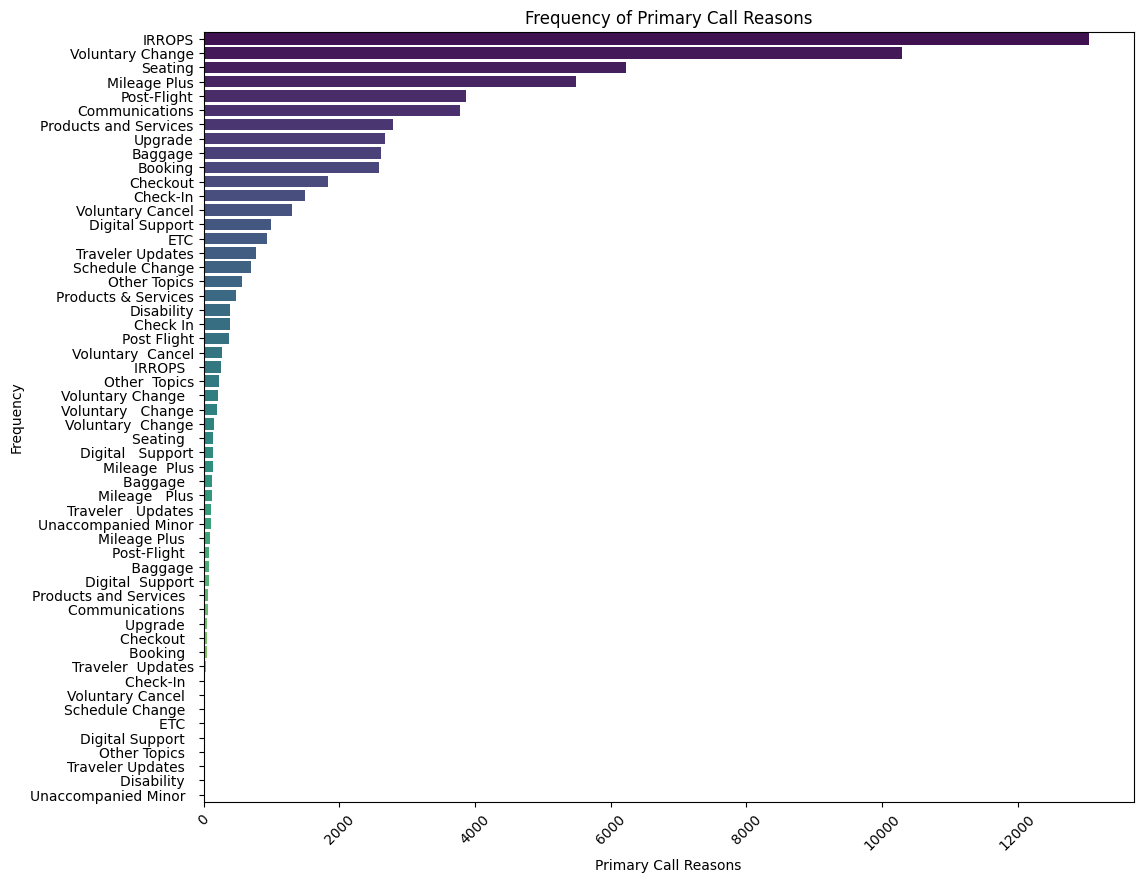

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

call_reason_counts = cleaned_data['primary_call_reason'].value_counts()

plt.figure(figsize=(12,10))
sns.barplot(x= call_reason_counts.values , y=call_reason_counts.index, orient='h', palette='viridis')
plt.title('Frequency of Primary Call Reasons')
plt.xlabel('Primary Call Reasons')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [29]:
call_reason_counts.head(6)

primary_call_reason
IRROPS              13057
Voluntary Change    10291
Seating              6223
Mileage Plus         5487
Post-Flight          3869
Communications       3779
Name: count, dtype: int64

Word Cloud of Call Transcripts:
#The word cloud visualizes the most common words spoken during calls, indicating recurring themes or issues.
Larger words represent more frequently used terms, which can guide your understanding of customer concerns and pain points.

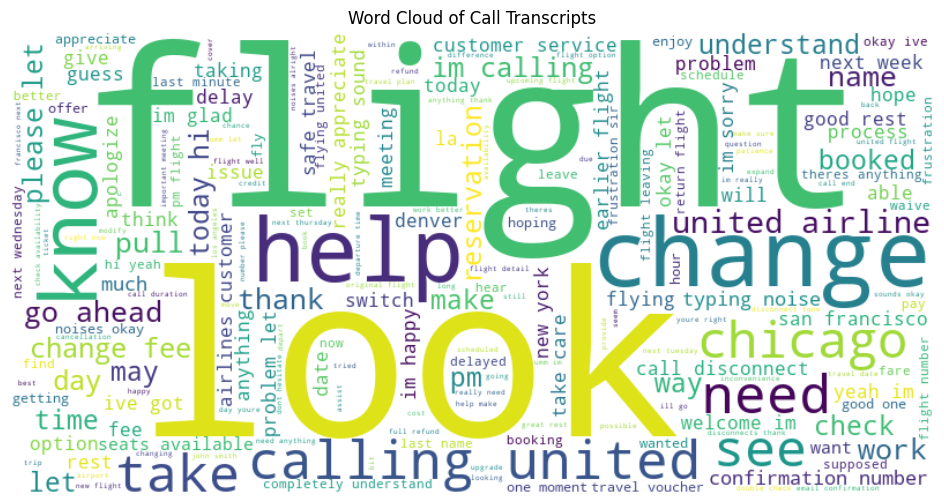

In [30]:
from wordcloud import WordCloud

# Generate a word cloud from the cleaned transcript
text = ' '.join(new_data['cleaned_transcript'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Call Transcripts')
plt.show()

Count Plot of Call Reasons by elite_level_code
#This count plot will reveal if elite customers have different concerns compared to non-elite customers.
Understanding the distribution can help tailor services or self-service options for specific customer segments.

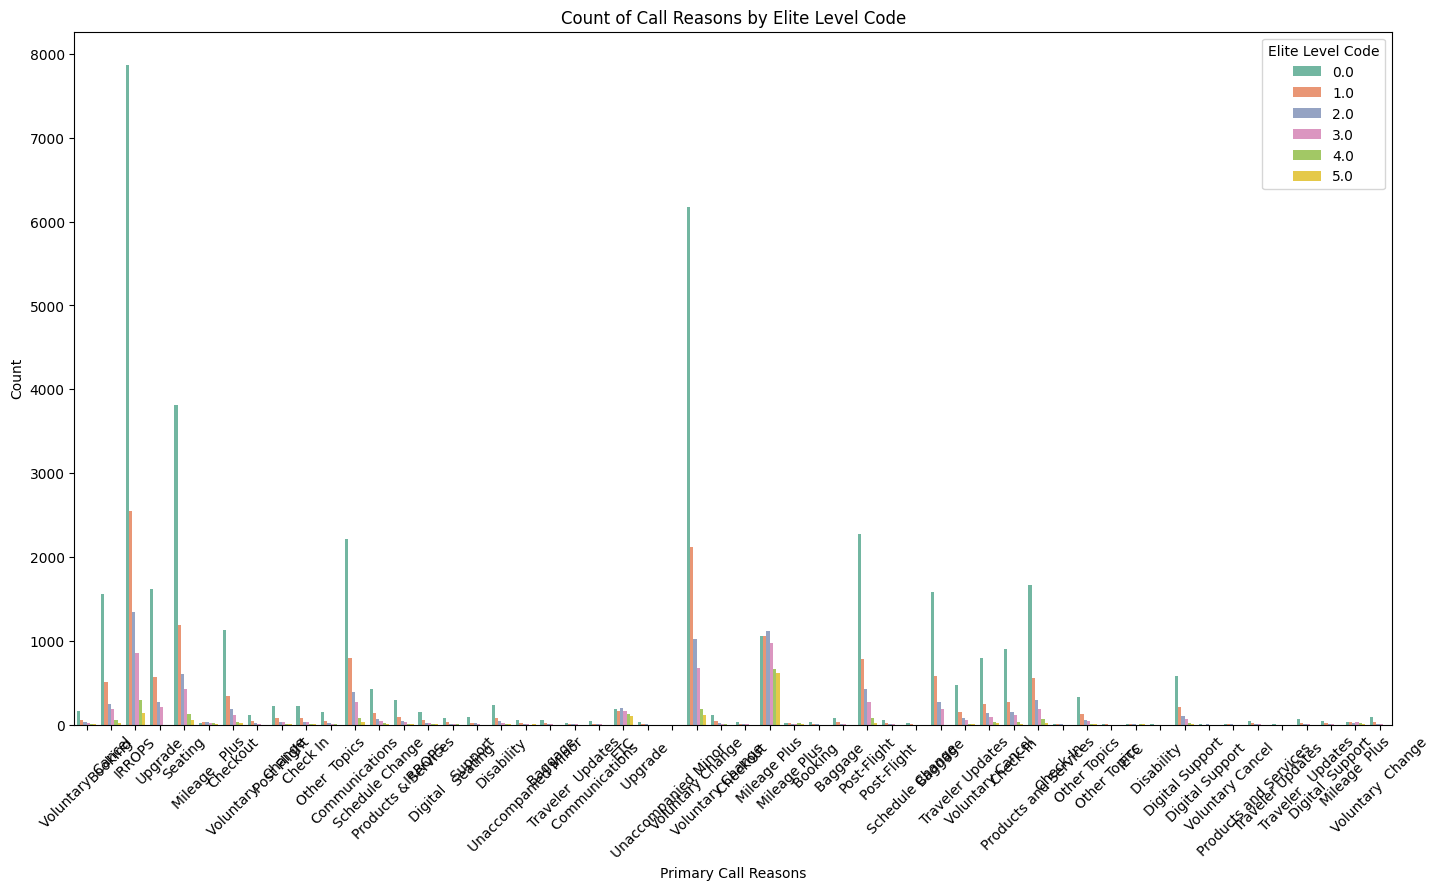

In [31]:
plt.figure(figsize=(17, 9))
sns.countplot(data=cleaned_data, x='primary_call_reason', hue='elite_level_code', palette='Set2')
plt.title('Count of Call Reasons by Elite Level Code')
plt.xlabel('Primary Call Reasons')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Elite Level Code')
plt.show()

Heatmap of Correlations:
#The heatmap illustrates the relationships between different numeric features, indicating where there may be strong correlations.
For example, a strong positive correlation between AHT_seconds and AST_seconds could suggest that calls taking longer to be answered also tend to take longer to resolve.

In [32]:
import plotly.express as px

# Select only the specified columns
selected_columns = ['AHT_seconds', 'AST_seconds', 'average_sentiment', 'elite_level_code', 'silence_percent_average']

numeric_features = new_data[selected_columns]

corr_matrix = numeric_features.corr()

fig = px.imshow(corr_matrix, 
                text_auto=True, 
                aspect="auto", 
                color_continuous_scale='RdBu_r', 
                title='Correlation Heatmap of Selected Features')
fig.show()

Box Plot of AHT by Call Reason:
#This box plot provides a visual representation of the distribution of AHT for each call reason.
It can help identify which reasons lead to longer handling times, suggesting that these issues may need more focused resolution strategies.


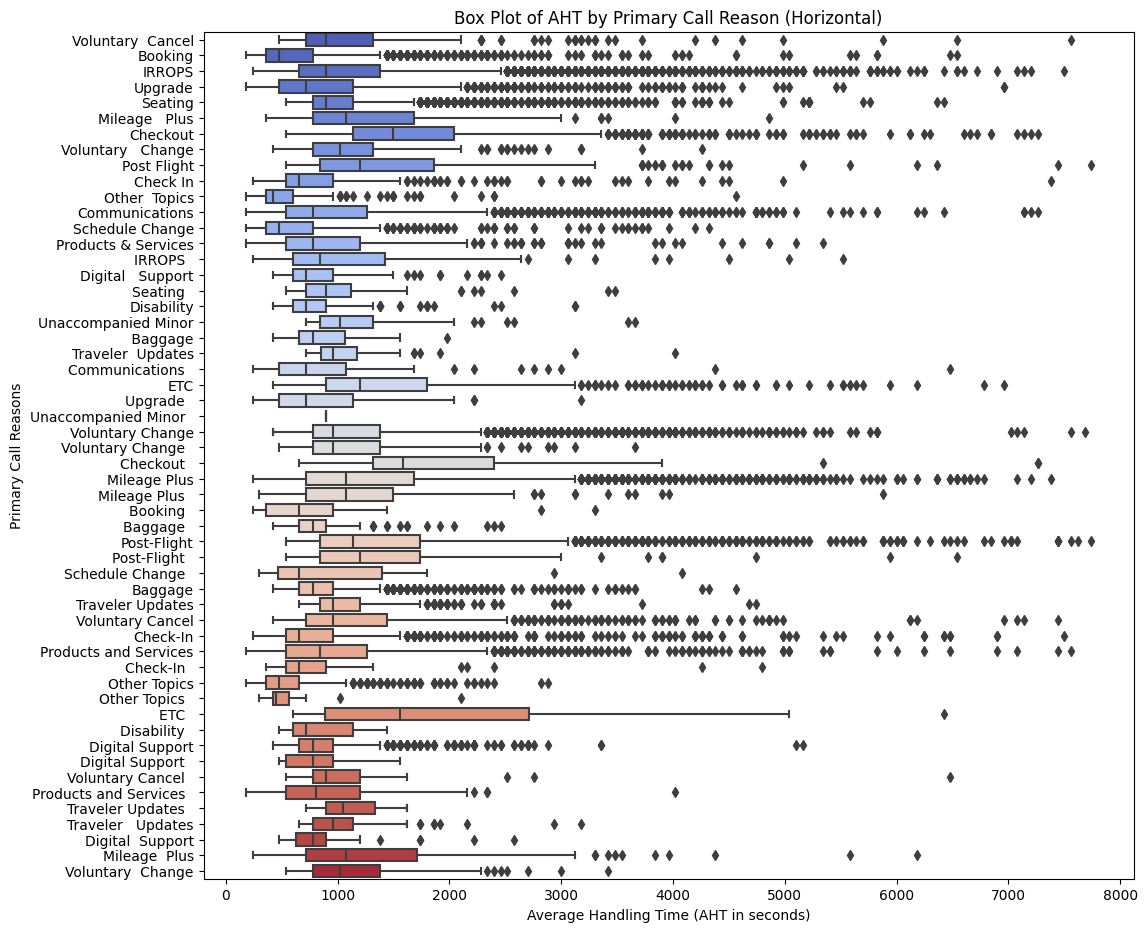

In [33]:
plt.figure(figsize=(12, 11))
sns.boxplot(data=new_data, y='primary_call_reason', x='AHT_seconds', palette='coolwarm')
plt.title('Box Plot of AHT by Primary Call Reason (Horizontal)')
plt.xlabel('Average Handling Time (AHT in seconds)')
plt.ylabel('Primary Call Reasons')
plt.show()

# Clustering Analysis

In [34]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming cleaned_data is your cleaned DataFrame
# Example: cleaned_data = pd.read_csv('cleaned_data.csv')

# Step 1: Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(cleaned_data['cleaned_transcript'])

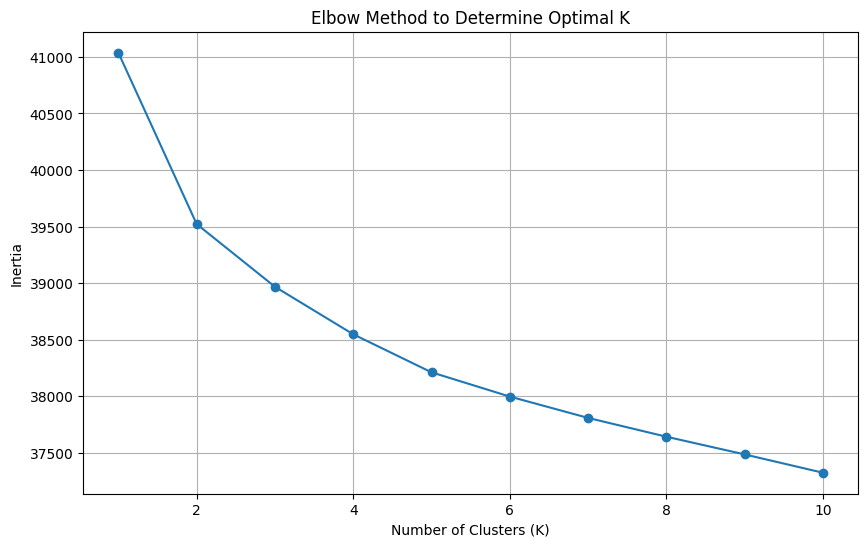

In [38]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 2: Use the elbow method to determine the optimal number of clusters
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal K')
plt.grid()
plt.show()

In [39]:
# Step 3: Apply K-Means with the chosen K
k = 3  # Replace with the optimal K determined from the elbow method
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)

# Add the cluster labels to your cleaned_data DataFrame
cleaned_data['cluster'] = clusters

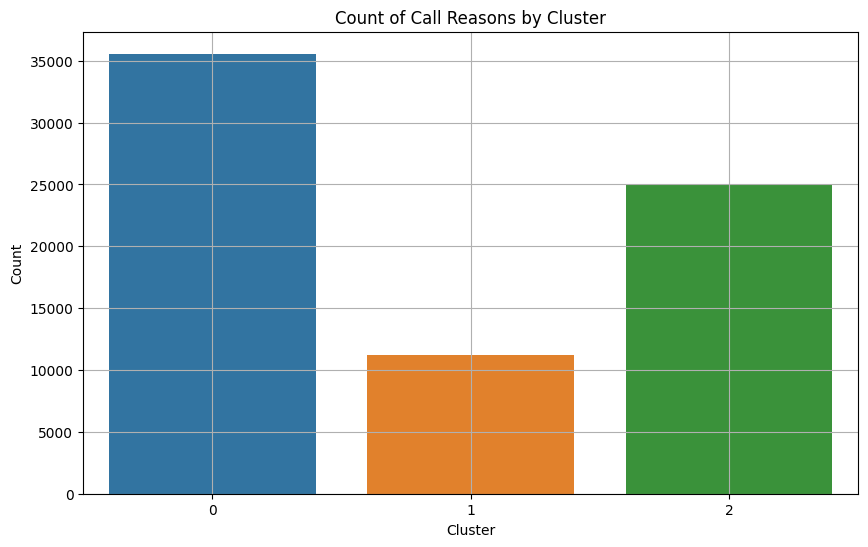

In [40]:
import seaborn as sns

# Step 4: Visualize the distribution of call reasons across clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=cleaned_data)
plt.title('Count of Call Reasons by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.grid()
plt.show()